<a href="https://colab.research.google.com/github/JannatL/Quiz1_Diamonds/blob/main/J_Lily_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Import Data
url = "https://raw.githubusercontent.com/JannatL/Quiz1_Diamonds/main/diamonds.csv"
df = pd.read_csv(url)

#Preview of Data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Part 1: Data Summary

A Summary of the Diamond Data Set. There are 53,940 cases of diamonds in this set. Each case has a total of 10 attributes: carat, cut, color, clarity, depth, table, price, x, y, z.


In [2]:
# Rows and columns
print("Number of rows and columns:", df.shape)

# Data types of each column
df.dtypes

Number of rows and columns: (53940, 11)


,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


The dataset includes both **numerical** and **categorical** attributes:
- **Numerical**: carat, depth, table, price, x, y, z
- **Categorical**: cut, color, clarity


In [3]:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observations from the numerical data:
- The average diamond weighs around 0.8 carats and costs about $3,933.

- The most expensive diamond in the dataset costs $18,823.

- The least expensive diamond in the dataset costs $326.
- The values for `x`, `y`, and `z` that are 0 may indicate missing data.


In [4]:
# Unique value counts for categorical variables
print("Cut Distribution:\n", df['cut'].value_counts())
print("\nColor Distribution:\n", df['color'].value_counts())
print("\nClarity Distribution:\n", df['clarity'].value_counts())


Cut Distribution:
 cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Color Distribution:
 color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Clarity Distribution:
 clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


Categorical attribute distributions:
- **Cut**: Most diamonds are labeled as "Ideal" or "Premium", indicating a higher quality cut.
- **Color**: The most common colors are G, E, and F — mid to high-quality colors.
- **Clarity**: Most diamonds fall into the SI1, VS2, and SI2 clarity grades.


In [5]:
df.isnull().sum()


,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


There are no missing values in the dataset.

## Part 2: Exploratory Data Analysis (EDA)

We begin with an analysis of the numerical value **`price`**, which represents the cost of each diamond in U.S. dollars.

### Price of Diamonds


In [6]:
# Import libraries needed for EDA and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots in Jupyter/Colab
%matplotlib inline
sns.set(style="whitegrid")  # Clean Seaborn style

# Summary statistics for price
print("Summary statistics for Price:")
print(df['price'].describe())


Summary statistics for Price:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


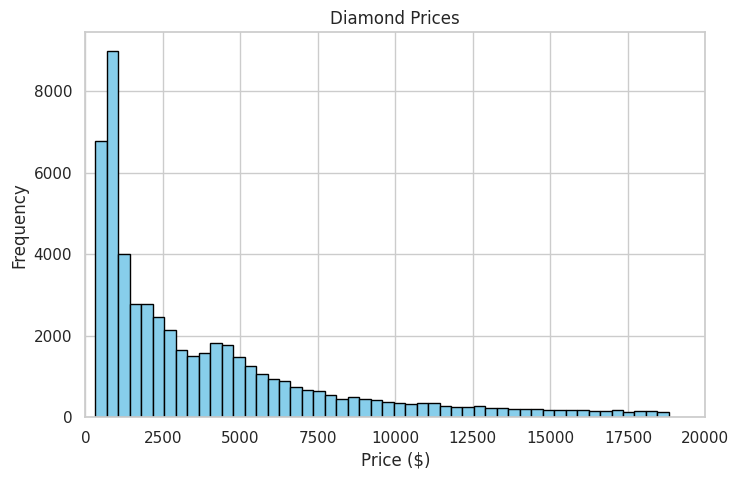

In [8]:
# Histogram of price with Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Diamond Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 20000)
plt.show()


- The histogram of diamond prices shows a right-skewed distribution which indicates that most diamonds are priced below $5,000.

- There is a larger avaialibility of diamonds below $1,000.

- The price ranges from 326 to 18,823 dollars

### Relationship Between Carat and Price

Next, we examine the relationship between a diamond's **weight (carat)** and its **price** using a scatter plot. This helps us understand whether larger diamonds tend to be more expensive.


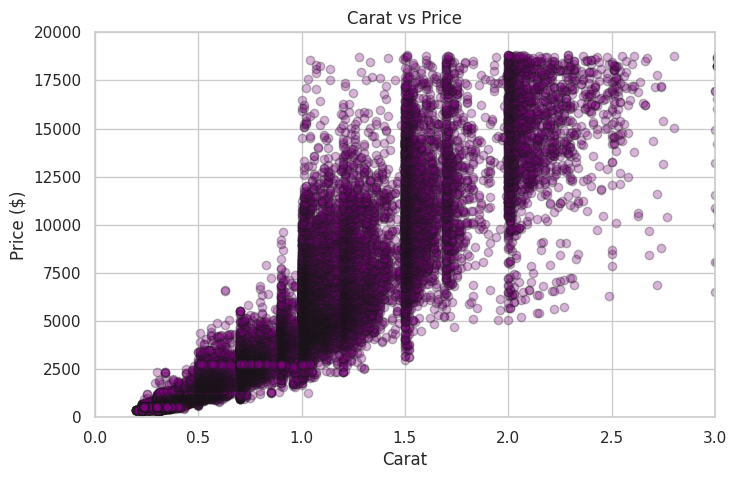

In [15]:
# Scatter plot using Matplotlib
plt.figure(figsize=(8, 5))
plt.scatter(df['carat'], df['price'], alpha=0.3, color='purple', edgecolor='k')
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.xlim(0, 3)  # Zoom in to make the plot easier to interpret
plt.ylim(0, 20000)
plt.show()


There is a strong positive correlation between carat and price. The price of the diamond increases with the carat weight.

However:
- The relationship is **non-linear** because the price increases rapidly for larger carats.
- There's more **variability** in price at higher carat values.

This suggests that size is a major driver of price, but not the only only factor, due to a variation.

### Relationship Between Clarity and Price

Next, we examine the relationship between a diamond's **clarity** and its **price** using a box plot.


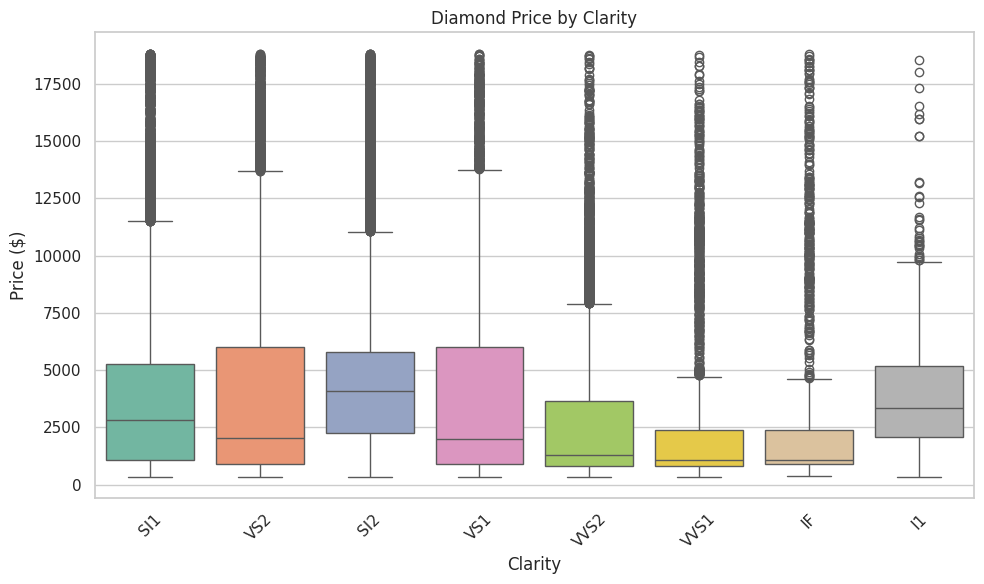

In [13]:
#ignore warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df, palette='Set2', order=df['clarity'].value_counts().index)
plt.title('Diamond Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Clarity ranges from most flawless at IF to most visible flaws at SI1

- Prices generally increase as clarity improves, especially for high grades like **IF**, **VVS1**, and **VVS2**.
- However, **price variation is still high** within each clarity group and some lower clarity diamonds (like SI1 or SI2) still have high prices.

- This shows that clarity is important but not as important as the diamond's carat to the pricing.

### Relationship Between Cut and Price

Next, we examine the relationship between a diamond's **cut** and its **average price** using a bar graph.

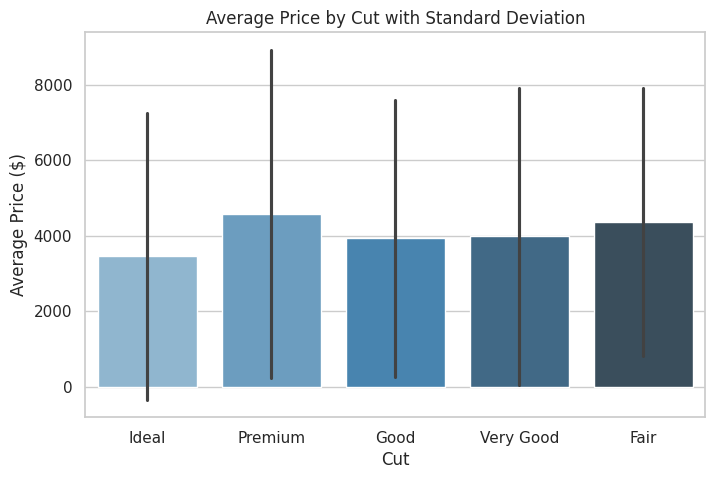

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='cut', y='price', data=df, ci='sd', palette='Blues_d')
plt.title('Average Price by Cut with Standard Deviation')
plt.xlabel('Cut')
plt.ylabel('Average Price ($)')
plt.show()


- This plot shows that there is no significant correlation between a better cut like **Ideal** and a higher price.
- Fair cut diamonds are surprisingly the highest average price and ideal cuts are the lowest.

This suggests that while cut probably do influences price, it does not have much influence.

### Relationship Between Color and Price

Next, we examine the relationship between a diamond's **color** and its **average price** using a bar graph.



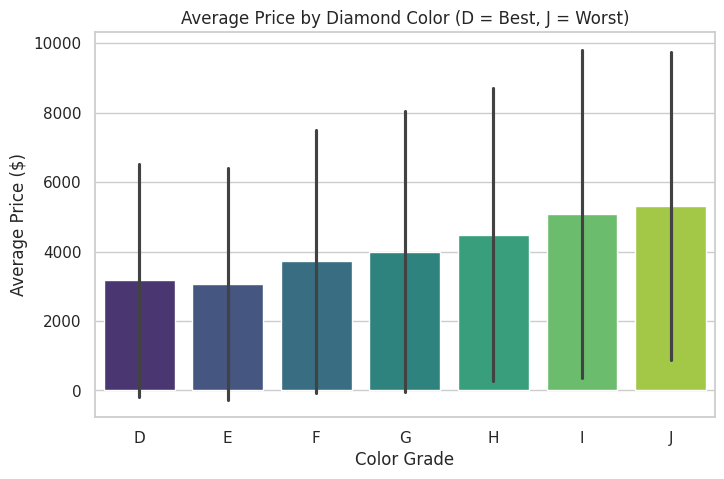

In [30]:
# Define the correct color order
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

plt.figure(figsize=(8,5))
sns.barplot(x='color', y='price', data=df, ci='sd', palette='viridis', order=color_order)
plt.title('Average Price by Diamond Color (D = Best, J = Worst)')
plt.xlabel('Color Grade')
plt.ylabel('Average Price ($)')
plt.show()



- Diamond colors are graded from best (most colorless) at D to worst (most yellow tint) at J

- Surprisingly, the average price of diamonds increase as the color grade gets worse. This indicates that a good color grade does not nessesarily increase the price of a diamond.

- This bar graph shows that

## Part 3: Inferences

###1. What proportion of diamonds are between 0.30 and 1.08 carats?


In [18]:
#total num of diamonds
total = len(df)

#filter diamonds within .30 to 1.08
in_range = df[(df['carat'] >= 0.30) & (df['carat'] <= 1.08)]

#divide filterd dimonds by total to get porportion
proportion = len(in_range) / total

print(f"Proportion: {proportion:.4f}")


Proportion: 0.7468


To determine the answer, find the total number of diamonds. Ther use the in_range function to filter out the diamonds of carat 0.30 to 1.08 from total. Divide the total by this number.

###2. How many of the diamonds have equal x and y dimensions?

In [19]:
equal_xy = df[df['x'] == df['y']]
count_equal_xy = len(equal_xy)

print(f"Number of diamonds with equal x and y dimensions: {count_equal_xy}")


Number of diamonds with equal x and y dimensions: 17


When a diamond's x and y dimensions are equal, set boolean to true. Then use the len() function to count how many diamonds are set true and thus shaped as a perfect square (17)

###3. How many of the diamonds have a carat value that is less than the mean carat value?

In [20]:
# find and set mean carat value
mean_carat = df['carat'].mean()

# filter diamonds with carat less than mean
below_mean = df[df['carat'] < mean_carat]

# Count answer
count_below_mean = len(below_mean)

print(f"Mean carat value: {mean_carat:.4f}")
print(f"Number of diamonds with carat less than the mean: {count_below_mean}")


Mean carat value: 0.7979
Number of diamonds with carat less than the mean: 31127


Calculate the mean carat weight, then filter for all the diamonds that have a carat value below this mean.

###4. How many diamonds have a Premium cut or better?

In [21]:
# filter premium' or ideal
high_quality_cuts = df[df['cut'].isin(['Premium', 'Ideal'])]

# count them
count_high_quality = len(high_quality_cuts)

print(f"Number of diamonds with a Premium cut or better: {count_high_quality}")


Number of diamonds with a Premium cut or better: 35342


Filter for the diamonds with a **Premium** or **Ideal** cut and use len() to count them.

###5. Which diamond has the highest price per carat? What is its value?



In [22]:
#create a new column for price per carat
df['price_per_carat'] = df['price'] / df['carat']

#find the row with the maximum price per carat
max_ppc_row = df.loc[df['price_per_carat'].idxmax()]

#extract the value
max_ppc_value = max_ppc_row['price_per_carat']

print("Diamond with highest price per carat:")
print(max_ppc_row)
print(f"\nHighest price per carat: ${max_ppc_value:.2f}")


Diamond with highest price per carat:
Unnamed: 0                27636
carat                      1.04
cut                   Very Good
color                         D
clarity                      IF
depth                      61.3
table                      56.0
price                     18542
x                          6.53
y                          6.55
z                          4.01
price_per_carat    17828.846154
Name: 27635, dtype: object

Highest price per carat: $17828.85


For each diamond, calculate the price per carat value (price/carat) and create a new column to put these values into. Use idxmax to find the max value in this column, then extract this value ($17828.85)

###6. Boxplots of the diamond price for each distinct cut value:

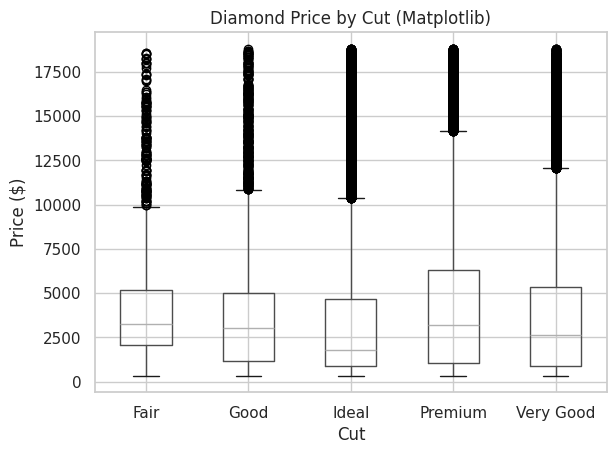

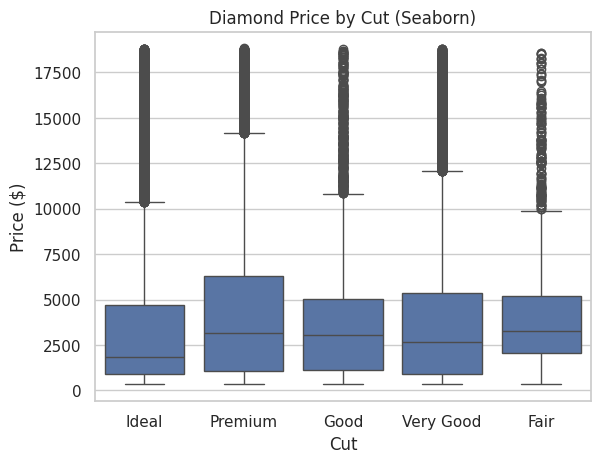

In [26]:
# Matplotlib boxplot
df.boxplot(column='price', by='cut')
plt.title('Diamond Price by Cut (Matplotlib)')
plt.suptitle('')  # removes default subtitle
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.show()

# Seaborn boxplot
sns.boxplot(x='cut', y='price', data=df)
plt.title('Diamond Price by Cut (Seaborn)')
plt.xlabel('Cut')
plt.ylabel('Price ($)')
plt.show()


This graph expands on the previous bar graph of cut versus price. It proves even futher that there is no significant correlation between cut and price.

- Fair cut diamonds have the most variablity in price and although they are the least desirable cut, they can be priced very high.

- Ideal and Prenium cuts are the most common cuts, but they are not always the most expensive. No one cut is most clearly expensive, which indicates that factors other than cut weigh heavily on pricing the stones.

###7. A Scatter plot of Price vs. Carat:

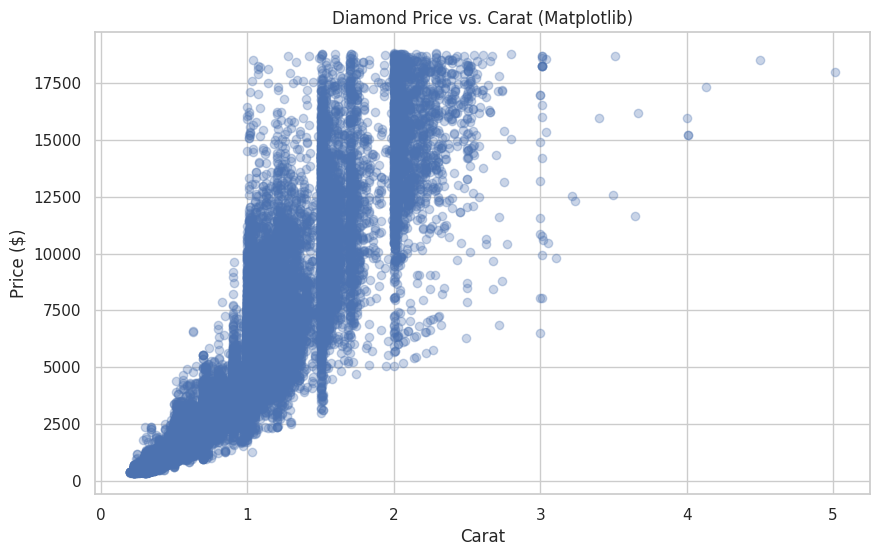

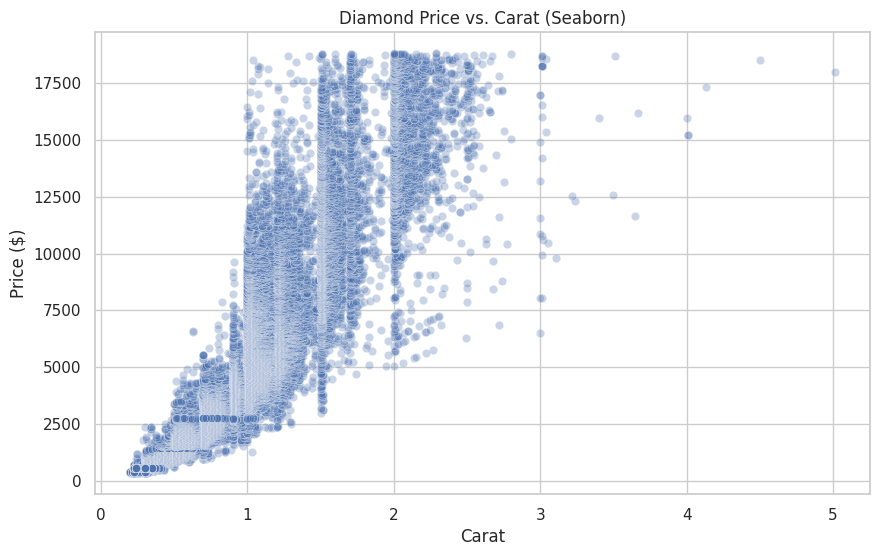

In [27]:
# Matplotlib scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.3)
plt.title('Diamond Price vs. Carat (Matplotlib)')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.3)
plt.title('Diamond Price vs. Carat (Seaborn)')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.show()


As stated before, there is a strong positive relationship between high carat and higher cost of a diamond. Bigger diamonds are generally more expensive. However, the most expensive diamonds have a higher variantion in carat size. This implies that there may be other factors outside of carat size that can significantly increase the value of a diamond. At the less expensive range, size matters more than other factors.

##Part 4: Conclusion

In the diamond business, it's well known that customers look for the 4C's of a diamond to determine its quality: carat, clarity, cut, and color.

One may assume that all four of these attributes are equally important to the actual value of a diamond. However, our analysis showed that only the carat and clarity of the stone matter noticably in its value.

The color of a diamond seems to have the least effect on its cost because there is a negative correlation between the average price of a diamond and its color grade. The whitest stones are also the cheapest on average. One possible explaination for this may be that bigger diamonds are less likely to have the best color and despite their color they will be highly valued.

The cut of a diamond also seems to have little effect on its cost, which indicates that this attribute is not very important to a pontential buyer.

The clarity of a diamond however, does noticably affect its cost. Although there are expensive stones in all variations of clarity, the cost of a stone generally increases as the clarity improves.

The most significant attribute of a diamond by far is its carat, or size. Bigger diamonds are the most expensive and smaller diamonds are cheaper.

Our analysis proves that contrary to the popular saying, the "4 C's" together don't determine a diamond's value as much as the carat alone does.